In [23]:
import matplotlib.pyplot as plt
import pandas as pd
numerical_data = pd.read_csv("dataset/numerical_dataset.csv")
categorical_data = pd.read_csv("dataset/categorical_dataset.csv")
# 刪掉第一列
numerical_data = numerical_data.drop(numerical_data.columns[0], axis=1)
categorical_data = categorical_data.drop(categorical_data.columns[0], axis=1)
categorical_data

,SALARY,AGE,GENDER,HS_TYPE,WORK,ACTIVITY,PARTNER,TRANSPORT,LIVING,KIDS,MOTHER_JOB,FATHER_JOB,ATTEND_DEPT,IMPACT,PREP_STUDY,PREP_EXAM,CLASSROOM,COURSE ID
0,1,2,2,3,1,2,2,1,1,1,2,5,1,1,1,1,2,1
1,1,2,2,3,1,2,2,1,1,1,2,1,1,1,1,1,2,1
2,2,2,2,2,2,2,2,4,2,1,2,1,1,1,1,1,1,1
3,2,1,1,1,1,2,1,1,2,1,2,1,1,1,1,2,1,1
4,3,2,2,1,2,2,1,1,4,1,2,4,1,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1,2,1,2,1,1,2,1,2,2,2,4,1,1,1,1,1,9
141,1,1,1,2,2,2,2,4,2,1,2,1,2,1,1,1,1,9
142,1,1,1,1,2,2,2,1,1,1,2,4,1,1,1,1,1,9
143,5,2,1,2,1,1,1,2,3,1,3,3,1,1,2,1,1,9


In [24]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 創建 LabelEncoder 實例
label_encoder = LabelEncoder()

# 使用 LabelEncoder 將類別型資料轉換為數值
numerical_data_encoded = numerical_data.apply(label_encoder.fit_transform)

#encoded_data


# 使用 pandas.get_dummies() 將類別型資料轉換為數值
categorical_columns = ['AGE', 'GENDER', 'HS_TYPE', 'WORK','ACTIVITY','PARTNER','TRANSPORT','LIVING','KIDS','MOTHER_JOB','FATHER_JOB','ATTEND_DEPT','IMPACT','PREP_STUDY','PREP_EXAM','CLASSROOM']
categorical_data_enocoded = pd.get_dummies(categorical_data, columns=categorical_columns, prefix=categorical_columns)
# 將categorical_data 的 salary、course id 刪掉
categorical_data_enocoded = categorical_data_enocoded.drop(columns=['SALARY', 'COURSE ID'])
# save to csv
categorical_data_enocoded.to_csv('dataset/encoded_categorical_dataset.csv', index=False)


In [25]:
# 結合 numerical_data 和 categorical_data
encoded_data = pd.concat([numerical_data_encoded, categorical_data_enocoded], axis=1)
# save to csv
encoded_data.to_csv('dataset/encoded_dataset.csv', index=False)


In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

scaler = StandardScaler(encoded_data)
normalized_data = pd.DataFrame(scaler.fit_transform(encoded_data), columns=encoded_data.columns)
normalized_data
# 把 SALARY 拿出來當目標函數
y = normalized_data['SALARY']
x = normalized_data.drop('SALARY', axis=1)
print(x)

TypeError: StandardScaler.__init__() takes 1 positional argument but 2 were given

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

In [ ]:
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=10)
# 訓練模型
rf_regressor.fit(X_train, y_train)

# 在測試集上進行預測
y_pred = rf_regressor.predict(X_test)

# 計算準確度
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

R-squared: 0.1359259533898305
RMSE: 0.24620875289071265


MOTHER_EDU: 0.11632813006551686
SCHOLARSHIP: 0.0653167244373337
HS_TYPE_1: 0.056518311098665536
FATHER_EDU: 0.05270741887245415
GRADE: 0.047410438743869056
READ_FREQ: 0.04729656524484345
#_SIBLINGS: 0.04615127987709914
CUML_GPA: 0.040173165118903294
NOTES: 0.03433738904195171
AGE_3: 0.02651824127553205


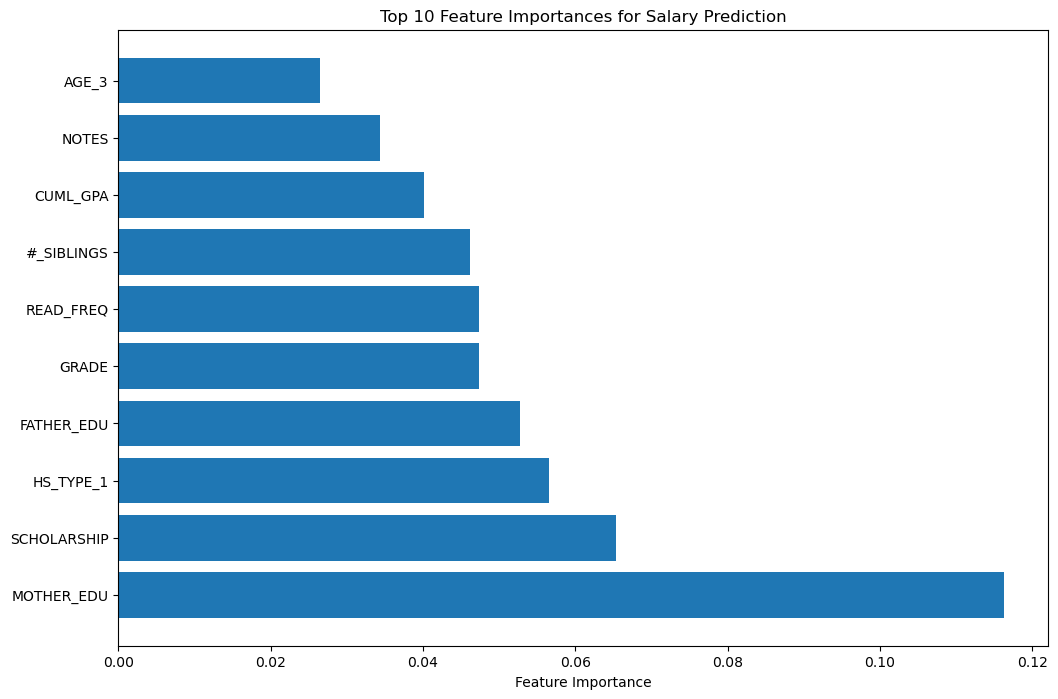

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained the RandomForestRegressor and stored feature_importances
feature_importances = rf_regressor.feature_importances_

# Create a dictionary mapping feature names to their importance
feature_importance_dict = dict(zip(x.columns, feature_importances))

# Sort the feature importance in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Select only the top 10 features
top_10_features = sorted_feature_importance[:10]

# Print the top 10 features and their importance
for feature, importance in top_10_features:
    print(f"{feature}: {importance}")

# Plot the top 10 feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_10_features)), [val[1] for val in top_10_features], align='center')
plt.yticks(range(len(top_10_features)), [val[0] for val in top_10_features])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances for Salary Prediction')
plt.show()


In [ ]:
!pip install shap

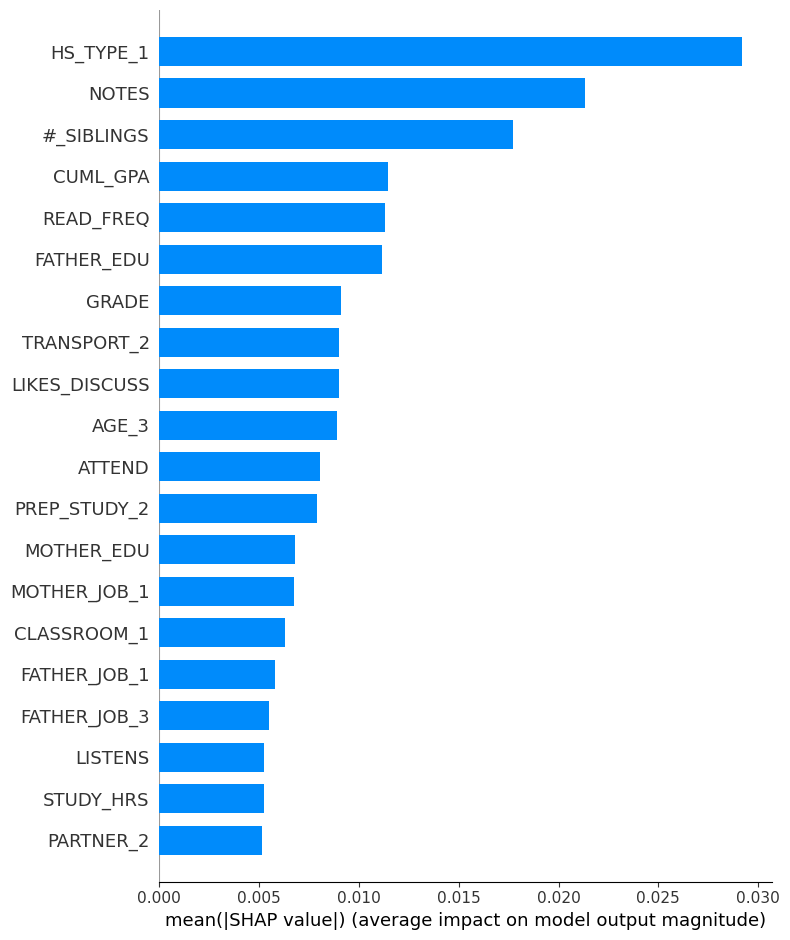

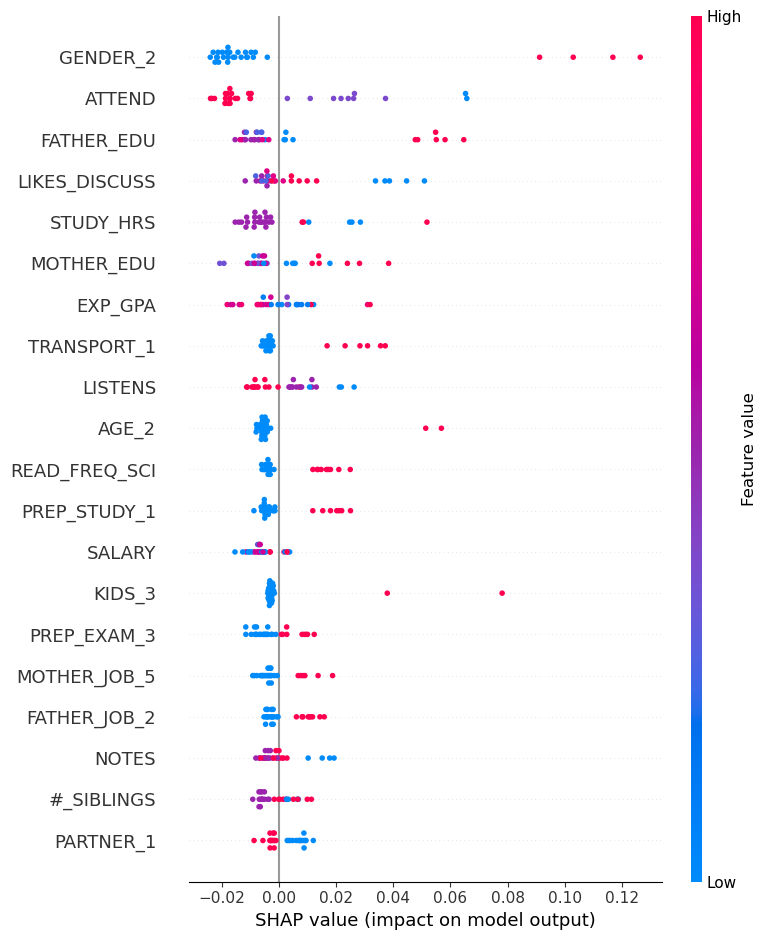

In [ ]:
import shap

# 創建一個 SHAP explainer
explainer = shap.Explainer(rf_regressor.predict, X_train)

# 計算 SHAP 值
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test, feature_names=encoded_data.columns)